# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

## Contornos

### Download das imagens de teste

### Imports

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

In [2]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/estrelas.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)

In [3]:
# binarizacao
th, img3 = cv.threshold(img2, 20, 255, cv.THRESH_BINARY)

# determinar os contornos da imagem
contornos, ordem = cv.findContours(img3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(f'Total de contornos = {len(contornos)}')

# ordenar os contornos por tamanho
contornos = sorted(contornos, key=cv.contourArea)

# visualizar os contornos
img4 = img1.copy()
_ = cv.drawContours(img4, contornos, 9, (255, 255, 0), 10)

Total de contornos = 10


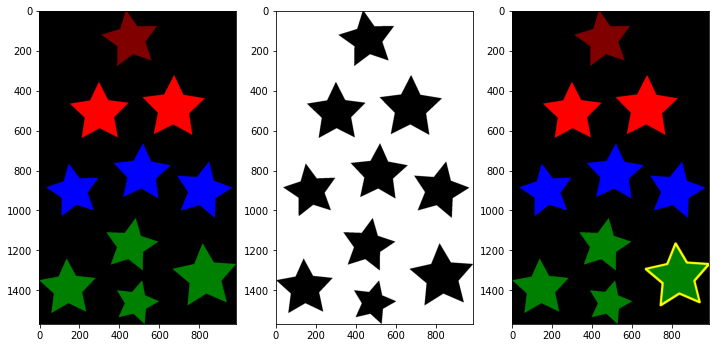

In [4]:
plt.figure(figsize=(12, 10))
plt.subplot(131), plt.imshow(img1)
plt.subplot(132), plt.imshow(img3, cmap='binary')
plt.subplot(133), plt.imshow(img4)
plt.show()

In [5]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/apple.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)

In [6]:
# binarizacao
th, img2 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)

# determinar os contornos da imagem
contornos, ordem = cv.findContours(img2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(f'Total de contornos = {len(contornos)}')

# visualizar os contornos
img3 = img1.copy()
contornos = sorted(contornos, key=cv.contourArea)
cv.drawContours(img3, contornos, 1, (255, 0, 0), 5)

img4 = img1.copy()
img5 = img1.copy()

for cont in contornos:
    # extrair o bounding box (caixa delimitadora)
    # cont = contornos[1]
    x, y, w, h = cv.boundingRect(cont)
    cv.rectangle(img4, (x, y), (x + w, y + h), (255, 0, 0), 5)

    # extrair o circulo minimo
    (x, y), raio = cv.minEnclosingCircle(cont)
    centro = (int(x), int(y))
    cv.circle(img5, centro, int(raio), (255, 0, 0), 5)


Total de contornos = 3


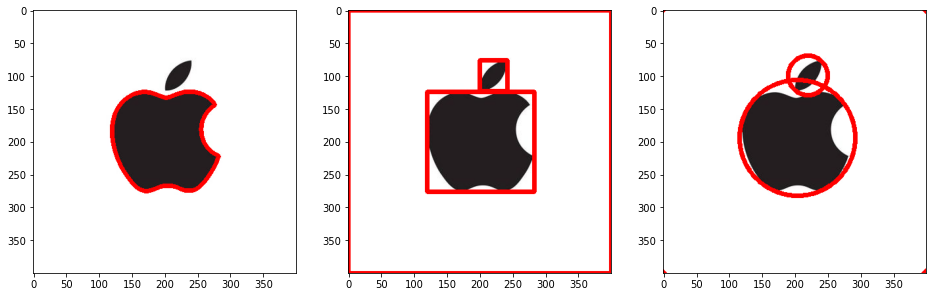

In [7]:
plt.figure(figsize=(16, 12))
plt.subplot(131), plt.imshow(img3)
plt.subplot(132), plt.imshow(img4)
plt.subplot(133), plt.imshow(img5)
plt.show()

In [8]:
img1 = cv.imread('drive/MyDrive/Colab Notebooks/College/Signal-Image-Processing/image_dataset_publico/hammer.jpg')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)

In [9]:
img2 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
th, img2 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)

# extrair os contornos da imagem
contornos, ordem = cv.findContours(img2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# produzir uma imagem binaria para visualizar o contorno
img3 = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)
img3 = cv.cvtColor(img3, cv.COLOR_GRAY2RGB)

# visualizar contorno
cv.drawContours(img3, contornos, -1, (255, 0, 0), 10)

# contorno aproximado
contorno= contornos[0]
epsilon = 0.01 * cv.arcLength(contorno, True)
aprox = cv.approxPolyDP(contorno, epsilon, True)
_ = cv.drawContours(img3, [aprox], -1, (255, 255, 0), 10)

# contorno convexo
hull = cv.convexHull(contorno)
_ = cv.drawContours(img3, [hull], -1, (0, 0, 255), 10)

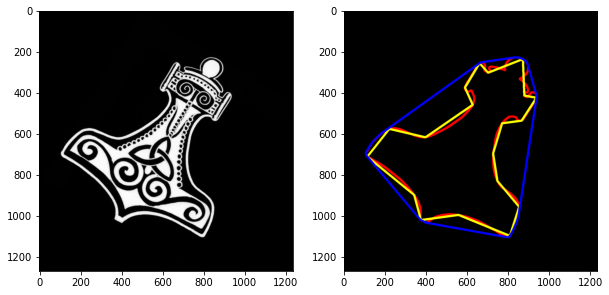

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(img3)
plt.show()

### Exercises

#### Imports

#### Code